In [1]:
from stock import* 
import numpy as np
import akshare as ak
import pandas as pd

In [2]:
import numpy as np
stock_list=["sz002594","sh603517","sh600031",
            "sz000858","sh603816","sh600690",
            "sh600519","sz002493","sh601318",
            "sz000895","sz002415","sh601021",
            "sz000333","sz300413","sz002332"]
day=70
ExpReturn=[]
ExpCov=[]
for s in stock_list:
    data = ak.stock_zh_a_daily(symbol=s, adjust="qfq")
    k=stock(data,s,day)
    ExpReturn.append(k.ExpReturn1())
    ExpCov.append(k.His_Return())
ExpReturn=np.array(ExpReturn)
ExpCov=np.array(ExpCov)
ExpCov=np.cov(ExpCov)
ExpCov

 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9555      0.068    -13.970      0.000      -1.090      -0.821
ma.L1          0.0633      0.160      0.394      0.693      -0.251       0.378
ma.L2         -0.6249      0.159     -3.939      0.000      -0.936      -0.314
sigma2      3894.4900    717.730      5.426      0.000    2487.766    5301.214
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 2.88
Prob(Q):                              0.69   Prob(JB):                         0.24
Heteroskedasticity (H):               0.39   Skew:                            -0.51
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.62

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=177.90

array([[ 8.74491704e-04,  1.93891318e-04,  2.73231107e-04,
         2.87761682e-04,  2.53415673e-04,  6.39057913e-05,
         2.12486955e-04,  2.53390045e-04,  1.58963208e-04,
         6.54396560e-05,  1.66678923e-04,  1.94573002e-04,
         1.41871442e-04,  1.87054363e-04,  1.81117318e-04],
       [ 1.93891318e-04,  7.36818288e-04,  1.67757518e-04,
         2.91467898e-04,  2.13046447e-04,  1.84223251e-05,
         2.13063034e-04,  1.47592395e-04,  9.97840630e-05,
         8.45385773e-05,  4.45735843e-05,  1.52344575e-04,
         7.72589110e-05,  1.26258553e-04,  2.05275164e-04],
       [ 2.73231107e-04,  1.67757518e-04,  5.75569986e-04,
         2.59436096e-04,  2.10258842e-04,  6.73723243e-05,
         1.97723518e-04,  2.44324527e-04,  1.91549009e-04,
         9.71522622e-05,  1.27899003e-04,  1.79140418e-04,
         1.47682713e-04,  1.53770666e-04,  1.76437260e-04],
       [ 2.87761682e-04,  2.91467898e-04,  2.59436096e-04,
         6.53566588e-04,  2.77182255e-04,  6.97303144

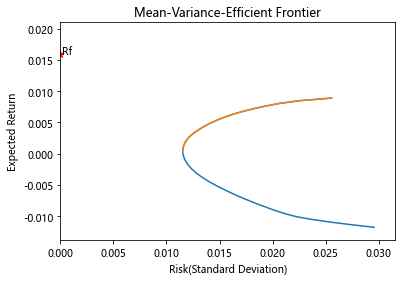

In [3]:
[target_variance, target_returns, PortWts, postive_target_returns, postive_target_variance]=frontcon(ExpReturn, ExpCov , 50)
# 找到满足前沿条件的解（上半直线）
plt.plot(target_variance, target_returns)
plt.plot(postive_target_variance, postive_target_returns)
plt.scatter(0,RF,s=50,marker='*',c='red')
plt.text(0.0001,RF,'Rf')
plt.ylim(np.array(target_returns).min()-0.002,RF+0.005)
plt.xlim(0,np.array(target_variance).max()+0.002)
plt.title("Mean-Variance-Efficient Frontier")
plt.xlabel("Risk(Standard Deviation)")
plt.ylabel("Expected Return")
plt.show()

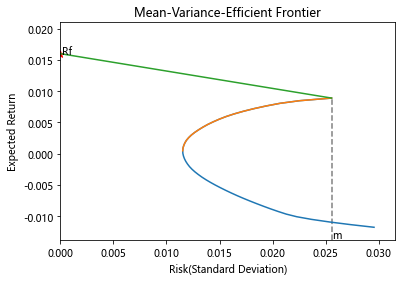

In [4]:
# 画证券市场线
[M,E_rm]=Get_M(postive_target_returns,postive_target_variance,RF)
x=[0,postive_target_variance[M]]
y=[RF,postive_target_returns[M]]
plt.plot(target_variance, target_returns)
plt.plot(postive_target_variance, postive_target_returns)
plt.plot(x,y)
plt.vlines(postive_target_variance[M],np.array(target_returns).min()-0.002,postive_target_returns[M],linestyles = "dashed",color='gray')
plt.scatter(0,RF,s=50,marker='*',c='red')
plt.text(0.0001,RF,'Rf')
plt.text(postive_target_variance[M]+0.0001,np.array(target_returns).min()-0.0018,'m')
plt.ylim(np.array(target_returns).min()-0.002,RF+0.005)
plt.xlim(0,np.array(target_variance).max()+0.002)
plt.title("Mean-Variance-Efficient Frontier")
plt.xlabel("Risk(Standard Deviation)")
plt.ylabel("Expected Return")
plt.show()

In [5]:
# 计算组合的beta系数
m=len(target_returns)-len(postive_target_returns)+M
beta=beta(sigma_rp(ExpCov,PortWts,m),postive_target_variance[M])
beta

0.02556494842612191

In [9]:
plan(stock_list,PortWts[m],1000000).perchase_plan()

股票sz002594(比亚迪)购买0股
股票sh603517(绝味食品)购买0股
股票sh600031(三一重工)购买0股
股票sz000858(五 粮 液)购买3600股
股票sh603816(顾家家居)购买0股
股票sh600690(海尔智家)购买0股
股票sh600519(贵州茅台)购买0股
股票sz002493(荣盛石化)购买0股
股票sh601318(中国平安)购买0股
股票sz000895(双汇发展)购买0股
股票sz002415(海康威视)购买0股
股票sh601021(春秋航空)购买0股
股票sz000333(美的集团)购买0股
股票sz300413(芒果超媒)购买0股
股票sz002332(仙琚制药)购买0股
